In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Getting the Tickers for the portfolio
#5 Stocks from SLP20 Index

In [ ]:
assets = ['JKH', 'RELI', 'CARG','DIAL', 'AEL']

In [ ]:
#Assigning Weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
#Stock Start Date
stockStartDate = '2019-01-01'

#Stock End Date
stockEndDate = '2019-12-31'

In [ ]:
#Creating a Dataframe
df = pd.DataFrame()

#Storing the adjusted close prices into the data frame
for stock in assets:
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = stockEndDate)['Adj Close']

In [ ]:
#Displaying the Dataframe
df

,JKH,RELI,CARG,DIAL,AEL
Date,,,,,
2019-01-02,191.959473,0.1550,32.939999,17.771191,27.330048
2019-01-03,187.548569,0.1588,32.230000,17.846607,27.114771
2019-01-04,194.598099,0.1749,33.189999,17.856043,28.465128
2019-01-07,198.501190,0.1620,34.130001,17.903179,28.416204
2019-01-08,201.538040,0.1675,35.439999,17.931467,28.269424
...,...,...,...,...,...
2019-12-24,263.267822,0.3099,36.060001,20.262758,29.358376
2019-12-26,263.737244,0.2875,35.830002,20.271538,29.506651
2019-12-27,263.787170,0.3000,35.730000,20.295916,29.229870


<function matplotlib.pyplot.show>

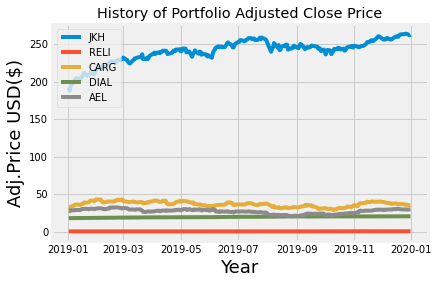

In [ ]:
#Visualization of Stock portfolio
title = 'History of Portfolio Adjusted Close Price'

opt_stocks = df

#Plotting the Graph
for c in opt_stocks.columns.values:
    plt.plot(opt_stocks[c], label = c)

plt. title(title)
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Adj.Price USD($)', fontsize = 18)
plt.legend(opt_stocks.columns.values, loc = 'upper left')
plt.show

In [ ]:
#Showing the daily simple returns
returns = df.pct_change()
returns

,JKH,RELI,CARG,DIAL,AEL
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.022978,0.024516,-0.021554,0.004244,-0.007877
2019-01-04,0.037588,0.101385,0.029786,0.000529,0.049802
2019-01-07,0.020057,-0.073756,0.028322,0.002640,-0.001719
2019-01-08,0.015299,0.033951,0.038383,0.001580,-0.005165
...,...,...,...,...,...
2019-12-24,0.000607,0.016066,-0.017037,-0.000144,-0.003021
2019-12-26,0.001783,-0.072281,-0.006378,0.000433,0.005051
2019-12-27,0.000189,0.043478,-0.002791,0.001203,-0.009380


In [ ]:
#The Covariance Matrix
cov_matrix = returns.cov()*253
cov_matrix

,JKH,RELI,CARG,DIAL,AEL
JKH,0.023053,-0.010670,0.024858,0.000080,0.023479
RELI,-0.010670,1.422321,0.012479,-0.000833,-0.004036
CARG,0.024858,0.012479,0.113827,0.000280,0.030895
DIAL,0.000080,-0.000833,0.000280,0.000653,-0.001699
AEL,0.023479,-0.004036,0.030895,-0.001699,0.106783


In [ ]:
#Calculating the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
port_variance

0.0726519614435675

In [ ]:
#Portfolio Volatility (Standard Deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.2695402779615089

In [ ]:
#Annual Portfolio Return
port_ann_return = np.sum(returns.mean() * weights * 253)
port_ann_return

0.43566653586832277

In [ ]:
#Expected Annual Returns, Volatility (Associated Risk) and Variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vol = str(round(port_volatility, 2) * 100) + '%'
percent_return = str(round(port_ann_return, 2) * 100)+ '%'

print('Expected Annual Return:' +percent_return )
print('Volatility(Associated Risk):' + percent_vol)
print('Annual Variance:' +percent_var )

Expected Annual Return:44.0%
Volatility(Associated Risk):27.0%
Annual Variance:7.000000000000001%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 4.7MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df) 

In [ ]:
efr = EfficientFrontier(mu, S)
weights = efr.max_sharpe() 
cleaned_weights = efr.clean_weights() 
print(cleaned_weights) 
efr.portfolio_performance(verbose=True)

OrderedDict([('JKH', 0.07149), ('RELI', 0.00493), ('CARG', 0.0), ('DIAL', 0.92156), ('AEL', 0.00202)])
Expected annual return: 16.3%
Annual volatility: 2.6%
Sharpe Ratio: 5.42


(0.16344009570360205, 0.02647125785951758, 5.418710983242114)

In [ ]:
pip install pulp

     |████████████████████████████████| 40.6MB 105kB/s 


In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'JKH': 3, 'RELI': 61, 'DIAL': 453}
Funds remaining: $0.08
